#pandas
pandas - библиотека, которая позволяет работать с табличными данными

[[1, 2], [3, 4]]

In [ ]:
!pip install pandas # если pandas не установлен, следует запустить эту ячейку

In [2]:
import pandas as pd # теперь импортируем pandas в тетрадку / .py файл с кодом

документация для pandas [лежит здесь](https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html)

Основные элементы "табличек в pandas" - это Series и Dataframe

Series - это объект, похожий на одномерный массив (как обычный список в питоне) с элементами и  индексами вдоль каждого элемента из списка. 

DataFrame "собирается" из таких Series

<img alt="Series vs DataFrame" height="300" width="700" src="https://storage.googleapis.com/lds-media/images/series-and-dataframe.width-1200.png" >

# Создание датафрейма

Создать датафрейм можно двумя способами:
- из словаря методом pd.DataFrame.from_dict()
- прочитав .csv файл

попробуем оба способа

### Первый способ

In [39]:
b = [[1, 2.1], [3, 4.444]]
b_df = pd.DataFrame(b) # краткий способ
b_df

,0,1
0,1,2.100
1,3,4.444


In [40]:
b_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2 non-null      int64  
 1   1       2 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 160.0 bytes


In [62]:
names = list(data.keys()) # индекс таблицы
v = list(data.values()) # столбцы таблицы

postcards = pd.DataFrame(v, index=names, columns=['city', 'age'])
# postcards = pd.DataFrame(v) - основа таблицы
# аргумент index - задает индекс датафрейма (имя строки) 
# аргумент columns - задает названия столбцов
postcards

,city,age
Maria,London,37
Lorenzo,Milan,28
Oleg,Canberra,31
Hans,Calgary,80
Mark,Milan,55
Alex,Krakow,35
Julia,Murmansk,43


In [30]:
postcards_2 = pd.DataFrame(v) # без аргументов плохо
postcards_2

,0,1
0,London,37
1,Milan,28
2,Canberra,31
3,Calgary,80
4,Milan,55
5,Krakow,35
6,Murmansk,43


In [29]:
print(names)
print(v)

['Maria', 'Lorenzo', 'Oleg', 'Hans', 'Mark', 'Alex', 'Julia']
[['London', 37], ['Milan', 28], ['Canberra', 31], ['Calgary', 80], ['Milan', 55], ['Krakow', 35], ['Murmansk', 43]]


In [9]:
# напрямую из словаря

data = {
    "Maria":["London",37], 
    "Lorenzo":["Milan",28],
    "Oleg":["Canberra",31],
    "Hans":["Calgary",80],
    "Mark":["Milan",55],
    "Alex":["Krakow",35],
    "Julia":["Murmansk",43]  
}

# шаг 2 используем метод pd.DataFrame.from_dict()
# аргументом подадим созданный словарь
# Но! тип данных нужно будет исправить

postcards = pd.DataFrame.from_dict(data, orient="columns").T.rename(columns={0:"city", 1:"age"})

In [10]:
print(postcards)

             city age
Maria      London  37
Lorenzo     Milan  28
Oleg     Canberra  31
Hans      Calgary  80
Mark        Milan  55
Alex       Krakow  35
Julia    Murmansk  43


In [14]:
display(postcards)
# в PyChram не работает функция display()

,city,age
Maria,London,37
Lorenzo,Milan,28
Oleg,Canberra,31
Hans,Calgary,80
Mark,Milan,55
Alex,Krakow,35
Julia,Murmansk,43


###Экспериментируем с аргументами .from_dict()

Почитать документацию [здесь](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.from_dict.html)

In [6]:
postcards = pd.DataFrame.from_dict(data)
postcards

,Maria,Lorenzo,Oleg,Hans,Mark,Alex,Julia
0,London,Milan,Canberra,Calgary,Milan,Krakow,Murmansk
1,37,28,31,80,55,35,43


In [22]:
postcards = pd.DataFrame.from_dict(data, orient="index").rename(columns={0:"city", 1:"age"}) # без T
postcards

,city,age
Maria,London,37
Lorenzo,Milan,28
Oleg,Canberra,31
Hans,Calgary,80
Mark,Milan,55
Alex,Krakow,35
Julia,Murmansk,43


In [23]:
postcards = pd.DataFrame.from_dict(data, orient="columns").T.rename(columns={0:"city", 1:"age"}) # columns, T
postcards

,city,age
Maria,London,37
Lorenzo,Milan,28
Oleg,Canberra,31
Hans,Calgary,80
Mark,Milan,55
Alex,Krakow,35
Julia,Murmansk,43


In [24]:
postcards = pd.DataFrame.from_dict(data).T.rename(columns={0:"city", 1:"age"}) # даже без orient="columns" (по умолчанию), T оставим
postcards

,city,age
Maria,London,37
Lorenzo,Milan,28
Oleg,Canberra,31
Hans,Calgary,80
Mark,Milan,55
Alex,Krakow,35
Julia,Murmansk,43


In [25]:
postcards = pd.DataFrame.from_dict(data).rename(columns={0:"city", 1:"age"}) # без Т, плохой вариант
postcards

,Maria,Lorenzo,Oleg,Hans,Mark,Alex,Julia
0,London,Milan,Canberra,Calgary,Milan,Krakow,Murmansk
1,37,28,31,80,55,35,43


In [ ]:
data = {'index': [('a', 'b'), ('a', 'c')],
        'columns': [('x', 1), ('y', 2)],
        'data': [[1, 3], [2, 4]],
        'index_names': ['n1', 'n2'],
        'column_names': ['z1', 'z2']}
pd.DataFrame.from_dict(data, orient='tight')

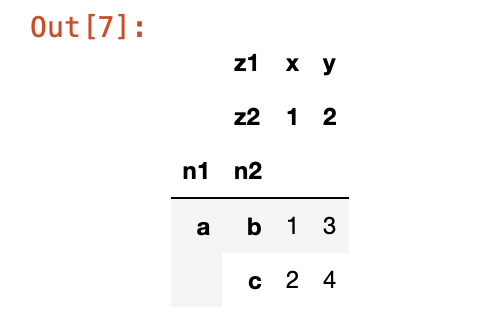

Для самых неутомимых: [.from_records()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.from_records.html)

### Второй способ

In [30]:
# прочитаем .csv файл методом pd.read_csv()

recipes = pd.read_csv("christmas_recipes.csv", encoding="utf-8", sep=",") # есть другие аргументы: sep, decimal и др.

### Как посмотреть на часть датафрейма

понадобятся методы ```.head()```, ```.tail()``` или индексация

In [31]:
recipes.head(2) # по умолчанию показывает 5 строк

,Title,Time,Servings,Ingredients,Instructions,Image
0,Perfect roast turkey,180,10 serving(s),"['20ml/¾fl oz rapeseed oil', '1 x 5kg/11lb goo...",Remove the turkey from the fridge and bring to...,https://ichef.bbci.co.uk/food/ic/food_16x9_832...
1,Stuffed roast turkey breast,180,8 serving(s),"['1 tbsp sunflower oil', '1 onion, finely chop...","To make the stuffing, heat the oil and gently ...",https://ichef.bbci.co.uk/food/ic/food_16x9_832...


In [17]:
# первые строки
recipes.head(2)

# для PyCharm
# print(recipes.head(2))

,Title,Time,Servings,Ingredients,Instructions,Image
0,Perfect roast turkey,180,10 serving(s),"['20ml/¾fl oz rapeseed oil', '1 x 5kg/11lb goo...",Remove the turkey from the fridge and bring to...,https://ichef.bbci.co.uk/food/ic/food_16x9_832...
1,Stuffed roast turkey breast,180,8 serving(s),"['1 tbsp sunflower oil', '1 onion, finely chop...","To make the stuffing, heat the oil and gently ...",https://ichef.bbci.co.uk/food/ic/food_16x9_832...


In [20]:
# последние строки
recipes.tail(3)

# для PyCharm
# print(recipes.tail(3))

,Title,Time,Servings,Ingredients,Instructions,Image
39,Sticky cranberry sausages,30,10 serving(s),"['2 red onions, sliced', '2 tbsp olive oil', '...",Fry the sliced red onions in a pan with the oi...,https://ichef.bbci.co.uk/food/ic/food_16x9_832...
40,Easy bread sauce,30,8 serving(s),"['1 large onion, peeled', '6 cloves', '1 bay l...",Press all the cloves into the whole peeled oni...,https://ichef.bbci.co.uk/food/ic/food_16x9_832...
41,Slow cooker honey roast ham,150,10 serving(s),"['1.6kg/3lb 8oz boneless, rolled smoked or uns...","Put the gammon, onion and 100ml/3½fl oz water ...",https://ichef.bbci.co.uk/food/ic/food_16x9_832...


In [21]:
# часть датафрейма по  индексам строчек
recipes[15:18]

# для PyCharm
# print(recipes[15:18])

,Title,Time,Servings,Ingredients,Instructions,Image
15,Slow cooked gammon with mustard sauce,150,12 serving(s),"['3kg/6lb 8oz unsmoked gammon joint, off the b...",Preheat the oven to 160C/140C Fan/Gas 3.\nTo m...,https://ichef.bbci.co.uk/food/ic/food_16x9_832...
16,Christmas roast duck,180,6 serving(s),"['1.5kg/3lb 5oz potatoes, peeled and thinly sl...",Arrange the shelves of your oven so that there...,https://ichef.bbci.co.uk/food/ic/food_16x9_832...
17,Roast goose,150,6 serving(s),"['1 x 5kg/11lb oven-ready goose', '1 onion, pe...",Preheat the oven to 200C/180C Fan/Gas 6.\nPlac...,https://ichef.bbci.co.uk/food/ic/food_16x9_832...


# Характеристики датафрейма

In [32]:
#размеры датафрейма

print(postcards.shape)
print(recipes.shape)

(7, 2)
(42, 6)


In [34]:
# описание датафрейма

print(postcards.info())
print(recipes.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Maria to Julia
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   city    7 non-null      object
 1   age     7 non-null      object
dtypes: object(2)
memory usage: 168.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         42 non-null     object
 1   Time          42 non-null     int64 
 2   Servings      42 non-null     object
 3   Ingredients   42 non-null     object
 4   Instructions  42 non-null     object
 5   Image         42 non-null     object
dtypes: int64(1), object(5)
memory usage: 2.1+ KB
None


In [ ]:
# object - текст (аналог в Python str)
# int64 - число (аналог в Python int)

In [36]:
# изменим тип колонки age на числовой методом .astype()

postcards["age"] = postcards["age"].astype("int64")
print(postcards.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Maria to Julia
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   city    7 non-null      object
 1   age     7 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 168.0+ bytes
None


### Как посмотреть, где живет конкретный человек?

Чтобы найти нужную строку, нам нужны индексы. 
Посмотрим на примере датасета с людьми и городами. У нашего датафрейма есть две оси: по строкам(нулевая, она же  index) и столбцам(первая, она же columns)


In [43]:
print(postcards.index)

Index(['Maria', 'Lorenzo', 'Oleg', 'Hans', 'Mark', 'Alex', 'Julia'], dtype='object')


In [42]:
print(recipes.index)

RangeIndex(start=0, stop=42, step=1)


In [44]:
print(postcards.columns)

Index(['city', 'age'], dtype='object')


In [ ]:
# пересечение индексов выдаст конкретную ячейку: ищем где живет Мария

postcards.loc['Maria']["city"]

**Получить строку по индексу** можно двумя способами:

- именной индекс, по "названию" строки в колонке "Index", (первая колонка датафрейма, у нас это имена людей)
- порядковый индекс, по номеру строки в датафрейме (нумерация с 0)

Для именного поиска понадобится метод ```.loc[]```, для порядкового -- ```.iloc[]```

In [45]:
print(postcards.iloc[3], "\n")

print(postcards.loc["Hans"])

city    Calgary
age          80
Name: Hans, dtype: object 

city    Calgary
age          80
Name: Hans, dtype: object


**Указав название колонки**,  можно аналогично посмотреть все значения в ней

In [46]:
print(postcards["age"]) # аналог получения значения по ключу словаря

Maria      37
Lorenzo    28
Oleg       31
Hans       80
Mark       55
Alex       35
Julia      43
Name: age, dtype: int64


In [47]:
# напечатайте города
print(postcards["city"])

Maria        London
Lorenzo       Milan
Oleg       Canberra
Hans        Calgary
Mark          Milan
Alex         Krakow
Julia      Murmansk
Name: city, dtype: object


In [48]:
postcards

,city,age
Maria,London,37
Lorenzo,Milan,28
Oleg,Canberra,31
Hans,Calgary,80
Mark,Milan,55
Alex,Krakow,35
Julia,Murmansk,43


# Операции с датафреймами

### Добавление колонок и строк в датафрейм

В датафрейм можно добавить новые колонки: понадобится метод ```.assign()```

In [67]:
postcards = postcards.assign(job=['Artist',"Teacher","Chef","Artist","Manager","Chef","Engineer"])

display(postcards)
# print(postcards)

,city,age,job
Maria,London,37,Artist
Lorenzo,Milan,28,Teacher
Oleg,Canberra,31,Chef
Hans,Calgary,80,Artist
Mark,Milan,55,Manager
Alex,Krakow,35,Chef
Julia,Murmansk,43,Engineer


In [50]:
# 2 способ - похож на добавление ключей в словарь
degrees = ['BA', 'MA', 'MA', 'PhD', 'Postdoc', 'BA', 'PhD']
postcards["degree"] = degrees

display(postcards)
# print(postcards)

In [51]:
display(postcards)


,city,age,job,degree
Maria,London,37,Artist,BA
Lorenzo,Milan,28,Teacher,MA
Oleg,Canberra,31,Chef,MA
Hans,Calgary,80,Artist,PhD
Mark,Milan,55,Manager,Postdoc
Alex,Krakow,35,Chef,BA
Julia,Murmansk,43,Engineer,PhD


Добавить строки тоже можно: методом ```.append()```

In [52]:
df = pd.DataFrame.from_dict({"Alice":["NY", 36, "Engineer", "MA"]},
                           orient="index",
                           columns=postcards.columns)

display(df)
# print(df)

,city,age,job,degree
Alice,NY,36,Engineer,MA


In [56]:
# шаг2 добавим новый df к старому
postcards = postcards.append(df)
postcards

# что будет, если запустить .append() несколько раз?

,city,age,job,degree
Maria,London,37,Artist,BA
Lorenzo,Milan,28,Teacher,MA
Oleg,Canberra,31,Chef,MA
Hans,Calgary,80,Artist,PhD
Mark,Milan,55,Manager,Postdoc
Alex,Krakow,35,Chef,BA
Julia,Murmansk,43,Engineer,PhD
Alice,NY,36,Engineer,MA
Alice,NY,36,Engineer,MA
Alice,NY,36,Engineer,MA


### что делать, если добавились ненужные строки? 

Если есть дубликаты уже существующих строк, понадобится метод ```.drop_duplicates()```

In [58]:
postcards.drop_duplicates(inplace=True)
display(postcards)
# print(postcards)

,city,age,job,degree
Maria,London,37,Artist,BA
Lorenzo,Milan,28,Teacher,MA
Oleg,Canberra,31,Chef,MA
Hans,Calgary,80,Artist,PhD
Mark,Milan,55,Manager,Postdoc
Alex,Krakow,35,Chef,BA
Julia,Murmansk,43,Engineer,PhD
Alice,NY,36,Engineer,MA


Если удалить нужно любую строку или столбец, понадобится метод ```.drop()``` 
- axis=0 если нужно удалить строку
- axis=1 если нужно удалить колонку

In [60]:
postcards.drop("Mark",axis=0)

,city,age,job,degree
Maria,London,37,Artist,BA
Lorenzo,Milan,28,Teacher,MA
Oleg,Canberra,31,Chef,MA
Hans,Calgary,80,Artist,PhD
Alex,Krakow,35,Chef,BA
Julia,Murmansk,43,Engineer,PhD
Alice,NY,36,Engineer,MA


In [61]:
postcards.drop("city", axis=1)

,age,job,degree
Maria,37,Artist,BA
Lorenzo,28,Teacher,MA
Oleg,31,Chef,MA
Hans,80,Artist,PhD
Mark,55,Manager,Postdoc
Alex,35,Chef,BA
Julia,43,Engineer,PhD
Alice,36,Engineer,MA


In [62]:
display(postcards)
# print(postcards)

,city,age,job,degree
Maria,London,37,Artist,BA
Lorenzo,Milan,28,Teacher,MA
Oleg,Canberra,31,Chef,MA
Hans,Calgary,80,Artist,PhD
Mark,Milan,55,Manager,Postdoc
Alex,Krakow,35,Chef,BA
Julia,Murmansk,43,Engineer,PhD
Alice,NY,36,Engineer,MA


Чтобы изменения вошли в силу, реультат выражения нужно сохранить в переменную, либо добавить аргумент inplace=True 

In [ ]:
postcards = postcards.drop("city", axis=1, inplace=True)
# в этой ячейке можете попробовать

### Сохранение датафрейма в файл 

In [63]:
# сохраним в .csv файл

postcards.to_csv('postcards.csv', encoding='utf-8') 

# postcards.to_excel('postcards.xlsx')

### Фильтры и прочие манипуляции

In [34]:
# посмотрим, кто работает шеф-поваром
# квадратные скобки создают подвыборку из датасета, удовлетворяющую условиям

postcards[ postcards["job"] == "Chef" ]

# print(postcards[ postcards["job"] == "Chef" ])

,city,age,job
Oleg,Canberra,31,Chef
Alex,Krakow,35,Chef


In [35]:
# поищем всех людей старше 40

postcards[ postcards["age"] > 40 ]

,city,age,job
Hans,Calgary,80,Artist
Mark,Milan,55,Manager
Julia,Murmansk,43,Engineer


In [44]:
# условия можно компоновать логическими операторами
# синтаксис: df[(условие1) оператор (условие2)]

#ищем, кто старше 30 и не работает шеф-поваром

postcards[ (postcards["age"] > 30) & (postcards["job"] != "Chef")  ]

# & | из темы множества

,city,age,job
Maria,London,37,Artist
Hans,Calgary,80,Artist
Mark,Milan,55,Manager
Julia,Murmansk,43,Engineer


Над значениями в колонках можно производить различные операции:
* например, арифметические (если данные количественные):

In [63]:
postcards["age"].sum() # работает всегда
postcards.age.sum() # краткая запись, работает с простыми названиями из 1 слова без пробелом

309

In [64]:
print(postcards.age.sum())
print(postcards.age.mean())
print(postcards.age.min())
print(postcards.age.max())

309
44.142857142857146
28
80


Если данные категориальные, можно искать уникальные значения, упорядочивать по алфавиту и тд

In [69]:
print(postcards.job.values) # все значения 
print(postcards.job.value_counts()) # число повторов
print(postcards.job.sort_values()) # сортировка

print(postcards.job.unique()) # все уникальные в колонке
print(postcards.job.nunique()) # сколько уникальных в колонке

['Artist' 'Teacher' 'Chef' 'Artist' 'Manager' 'Chef' 'Engineer']
Artist      2
Chef        2
Teacher     1
Manager     1
Engineer    1
Name: job, dtype: int64
Maria        Artist
Hans         Artist
Oleg           Chef
Alex           Chef
Julia      Engineer
Mark        Manager
Lorenzo     Teacher
Name: job, dtype: object
['Artist' 'Teacher' 'Chef' 'Manager' 'Engineer']
5


### Дополнительное задание 1: колонии

Вы работаете с датасетом от Гарвардского университета, в котором хранится информация о государствах - бывших колониях. Посчитайте:
* количество этих государств (Country Name)
* среднюю продолжительность колониального периода (COLYEARS)
* максимальную продолжительность зависимости (COLYEARS)

Скачать данные можно здесь: https://raw.githubusercontent.com/AnnSenina/Python_for_CL/main/data/Colonial.csv

In [ ]:
# ваш код здесь


### Дополнительное задание 2: тревожность и телевидение

Вы изучаете взаимосвязь тревожности и просмотра телевиденья. Вам необходимо расчитать следующие характеристики:

* Сколько человек приняло участие в исследовании?
* Каков минимальный и максимальный возраст участников?
* Сколько в выборке женщин?
* Какое среднее значение тревожности наблюдается в данных?

Скачать данные можно здесь: https://raw.githubusercontent.com/AnnSenina/Python_for_CL/main/data/socio.csv

In [ ]:
# ваш код здесь


###Бонус! raw-файлы в GitHub

In [61]:
# по raw-ссылке с GitHub csv-файлы тоже можно открывать

import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/AnnSenina/AnnSenina/main/2022.csv', decimal=',') # попробуйте без аргумента decimal, что не так?
data.head()

,Country,Happiness,Whisker-high,Whisker-low,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,7.821,7.886,7.756,1.892,1.258,0.775,0.736,0.109,0.534
1,Denmark,7.636,7.710,7.563,1.953,1.243,0.777,0.719,0.188,0.532
2,Iceland,7.557,7.651,7.464,1.936,1.320,0.803,0.718,0.270,0.191
3,Switzerland,7.512,7.586,7.437,2.026,1.226,0.822,0.677,0.147,0.461
4,Netherlands,7.415,7.471,7.359,1.945,1.206,0.787,0.651,0.271,0.419
